In [26]:
import requests
import io
from PIL import Image
from PIL import ImageDraw

28.0
34.0
25.0
26.0
25.0
26.0
35.0
29.0
22.0
25.0
32.0
29.0


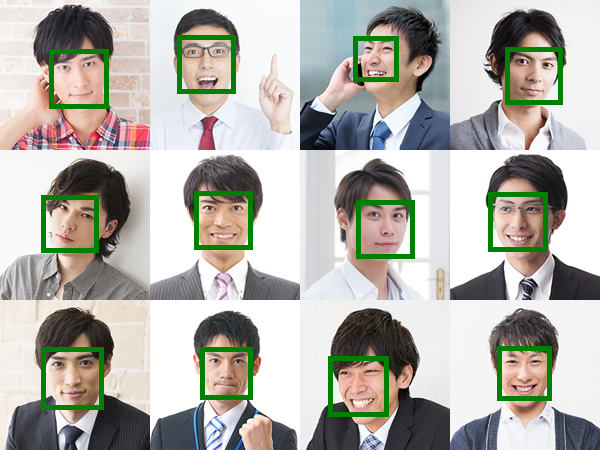

In [27]:
subscription_key='84b059f0bedd4a9fac76fc104fad52c7'
assert subscription_key
face_api_url= 'https://20210117.cognitiveservices.azure.com/face/v1.0/detect'
img=Image.open('sample02.jpg')
with io.BytesIO() as output: 
    img.save(output,format='JPEG')
    binary_img=output.getvalue()
    
headers={'Content-Type':'application/octet-stream',
        'Ocp-Apim-Subscription-Key':subscription_key}
params={'returnFaceId':'true',
        'returnFaceAttributes':'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion'}

res=requests.post(face_api_url,params=params,headers=headers,data=binary_img)

results=res.json()


for result in results:
    rect=result['faceRectangle']
    
    ag=result['faceAttributes']['age']

    draw=ImageDraw.Draw(img)
    draw.rectangle([(rect['left'],rect['top']),(rect['left']+rect['width'],rect['top']+rect['height'])],
                   fill=None,outline='green',width=5)
    
    print(ag)

img

